In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Ecommerce Purchases")

In [3]:
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [4]:
df.tail(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84
9999,"40674 Barrett Stravenue\nGrimesville, WI 79682",64 Hr,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...,Greene Inc,4139972901927273,02/19,302,JCB 15 digit,rachelford@vaughn.com,"Embryologist, clinical",176.119.198.199,el,67.59


In [5]:
df.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [8]:
df.shape

(10000, 14)

In [9]:
df.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [10]:
len(df.columns)

14

In [11]:
len(df)

10000

In [12]:
df['Purchase Price'].max()

99.99

In [14]:
df['Purchase Price'].min()

0.0

In [15]:
df['Purchase Price'].mean()

50.347302

In [72]:
sum(df[df['Language'] == 'fr'].value_counts())

10000

##  Job contains Engineers

In [36]:
len(df[df['Job'].str.contains('engineer')])

531

## Find Email of the person on the basis of IP Address 132.207.160.22

In [39]:
df[df['IP Address']=='132.207.160.22']

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,fr,0.95


In [40]:
df[df['IP Address']=='132.207.160.22']['Email']

2    amymiller@morales-harrison.com
Name: Email, dtype: object

## How many people have mastercard as their credit card provider and made a purchase above 50

In [43]:
(df['CC Provider']=='Mastercard') & (df['Purchase Price']>50)

0       False
1        True
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [50]:
len(df[(df['CC Provider']=='Mastercard') & (df['Purchase Price']>50)])

405

## Finding Email of the person with the following credit card number 4664825258997302

In [51]:
df[df['Credit Card']==4664825258997302]['Email']

9992    bberry@wright.net
Name: Email, dtype: object

## How many people purchase during AM and how many during PM

In [54]:
df['AM or PM']

0       PM
1       PM
2       PM
3       PM
4       AM
        ..
9995    PM
9996    AM
9997    AM
9998    PM
9999    AM
Name: AM or PM, Length: 10000, dtype: object

In [57]:
df['AM or PM'].value_counts()

AM or PM
PM    5068
AM    4932
Name: count, dtype: int64

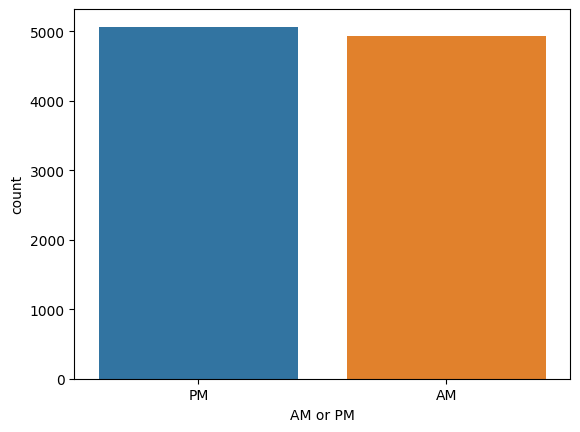

In [64]:
sns.countplot(x=df['AM or PM'])
plt.show()

## How many people have a credit card that expires in 2020

In [65]:
df['CC Exp Date'].head()

0    02/20
1    11/18
2    08/19
3    02/24
4    10/25
Name: CC Exp Date, dtype: object

In [67]:
sum(df['CC Exp Date'].apply(lambda x:x.split('/')[1]=='20'))

988

In [70]:
sum(df['CC Exp Date'].apply(lambda x:x[3:]=='20'))

988

## Top 5 Most popular Email providers

In [73]:
df['Email'].head()

0                 pdunlap@yahoo.com
1                anthony41@reed.com
2    amymiller@morales-harrison.com
3       brent16@olson-robinson.info
4       christopherwright@gmail.com
Name: Email, dtype: object

In [78]:
def gettingmail(mail):
    return mail.split('@')[1]
df['Email'].apply(gettingmail).value_counts().sort_values(ascending=False).head(5)

Email
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64

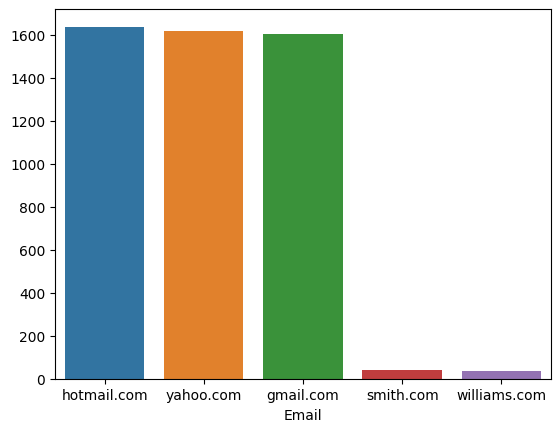

In [80]:
sns.barplot(x=df['Email'].apply(gettingmail).value_counts().sort_values(ascending=False).head(5).index,y=df['Email'].apply(gettingmail).value_counts().sort_values(ascending=False).head(5).values)
plt.show()

In [76]:
df.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [77]:
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,fr,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,fr,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,fr,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,fr,77.82
